##### Departamento de Física - Faculdade de Ciências e Tecnologia da Universidade de Coimbra #####
# Sistemas Dinâmicos e Complexos - Trabalho 2 #
### Rafael Isaque Santos - 2012144694 - Licenciatura em Física ###

Neste trabalho utilizo o Python 3.4.3, fazendo uso do Jupyter 4.0.6 para a apresentação, e das seguintes bibliotecas do Python:
+ **NumPy 1.10.4** - Pacote de cálculo númerico
+ **Matplotlib 1.5.1** - Pacote gráfico
+ **SciPy 0.17.0** - Pacote científico

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import ode, odeint
from scipy.signal import argrelmax
from scipy.stats import linregress

Definindo "%matplotlib <parâmetro>" designo o método de exibição de imagens do matplotlib no Notebook.
Recomendo para a visualização dos resultados:
+ __notebook__ - gera um objecto interactivo em *javascript*, manipulável no browser.
+ __inline__ - gera uma imagem estática abaixo da célula 

In [2]:
%matplotlib inline
#%matplotlib notebook

Em primeiro lugar, define-se uma função (do Python) para as equações de Lorenz:

$\frac{dx}{dt} = \sigma (y-x)$

$\frac{dy}{dt} = x(\rho -z)-y$

$\frac{dz}{dt}=xy-\beta z$

Em que $\sigma = 10$, $\rho =28 $ e $\beta=\frac{8}{3}$

In [3]:
def lorenz(vs, t0, sigma=10, rho=28, beta=8/3):
    x, y, z = vs
    x_dot = sigma * (y-x)
    y_dot = (rho-z) * x - y
    z_dot = x*y - beta*z
    return [x_dot, y_dot, z_dot]

Escolhe-se um número total de iterações numéricas **"stepCnt"**  e um intervalo de tempo entre cada iteração **"dt"** , que dá ao sistema uma precisão a utilizar.

O intervalo de tempo total em análise no sistema é dado por **stepCnt** * **dt**.

Os valores foram escolhidos de forma a obter uma representação nítida dos comportamentos a observar nas ilustrações gráficas abaixo, já que com valores inferiores se verificou difícil de fazer uma análise apropriada.

Pretende-se integrar em função do tempo as equações de Lorenz, para saber como as trajectórias evoluem para um sistema longo.
Como Lorenz fez anteriormente, na sua experiência, o valor de $\rho = 28$ passa o valor da bifurcação de Hopf em que:

$\rho_{H} = \frac{\sigma (\sigma + \beta + 3)}{\sigma - \beta - 1} \approx 24.74$

In [4]:
dt = 0.0001
time = 300
stepCnt = time/dt
t = np.linspace(0., time, num = stepCnt)
v0 = [0., 1., 0.]  # condição inicial x, y, z = 0, 1, 0

Para fazer a integração, utiliza-se o módulo **odeint** do scipy:

In [5]:
vt = odeint(lorenz, v0, t, ) # função, condição inicial, intervalo de integração

A primeira solução, à esquerda, estando compreendida nos primeiros 25 segundos, permite-nos observar o comportamento inicial do sistema.
A segunda solução, à direita, com um intervalo mais extenso, dá a entender como o sistema evolui depois de estabilizar.

Pode-se aferir que o sistema estabiliza para uma oscilação irregular à medida que $t \rightarrow \infty$.
O movimento é aperíodico.

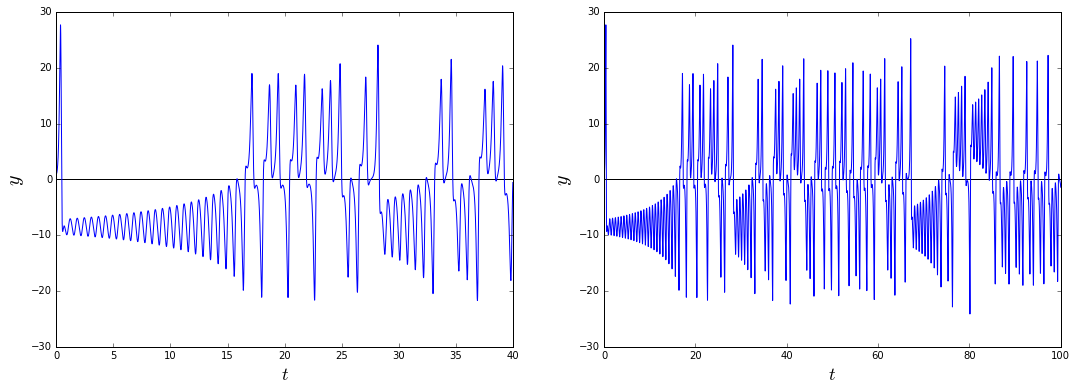

In [6]:
fig1 = plt.figure(figsize = (18,6))

ax1 = plt.subplot(121, xlim=(0,40))
ax1.set_xlabel('$t$', fontsize=18)
ax1.set_ylabel('$y$', fontsize=20) 
ax1.axhline(y = 0, color = 'k')
plt.plot(t, vt[:,1])

ax2 = plt.subplot(122, xlim=(0,100))
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$y$', fontsize=20) 
ax2.axhline(y = 0, color = 'k')
ax2.axhline(y=0, color='k')

plt.plot(t, vt[:,1])
plt.show()

Abaixo podem se comparar os diferentes planos de eixos, lado a lado.

A projecção do movimento no plano xz ($z(t)$ em função de $x(t)$) revela, como esperado, o padrão em forma de borboleta:

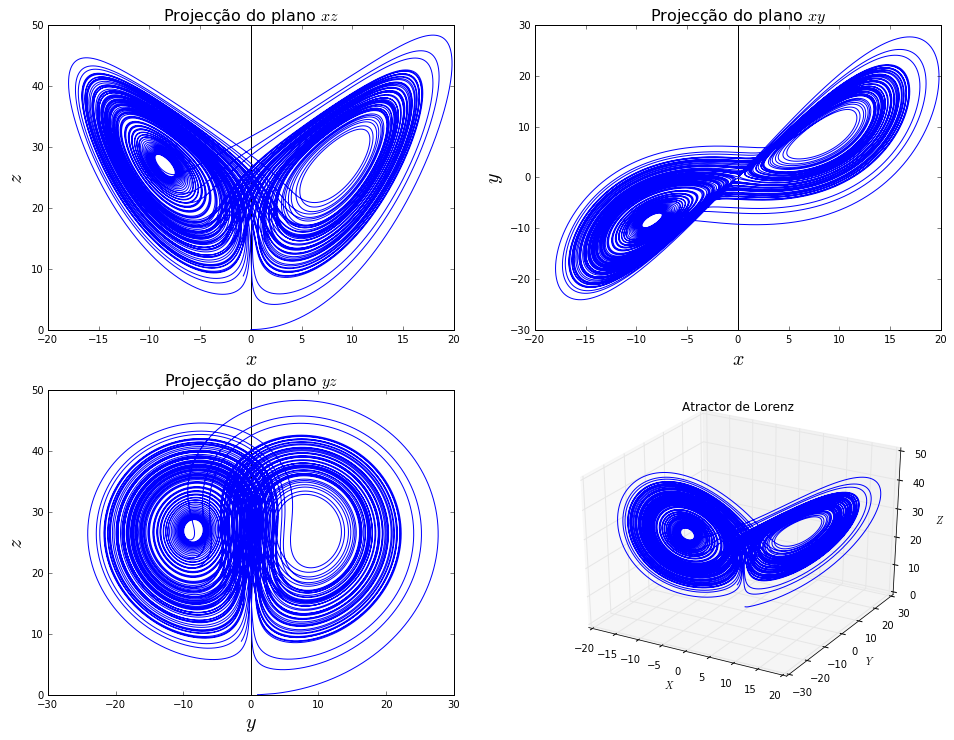

In [7]:
img_res = int(100 / dt)

fig2 = plt.figure(figsize = (16, 12))
axxz = fig2.add_subplot(2,2,1)
axxz.set_xlabel('$x$', fontsize=20)
axxz.set_ylabel('$z$', fontsize=20)
axxz.set_title('Projecção do plano $xz$', fontsize=16)
axxz.axvline(x = 0, color = 'k')
plt.plot(vt[:,0][:img_res], vt[:, 2][:img_res])

axxy = fig2.add_subplot(2,2,2)
axxy.set_xlabel('$x$', fontsize=20)
axxy.set_ylabel('$y$', fontsize=20)
axxy.set_title('Projecção do plano $xy$', fontsize=16)
axxy.axvline(x = 0, color = 'k')
plt.plot(vt[:,0][:img_res], vt[:,1][:img_res])

axyz = fig2.add_subplot(2,2,3)
axyz.set_xlabel('$y$', fontsize=20)
axyz.set_ylabel('$z$', fontsize=20)
axyz.set_title('Projecção do plano $yz$', fontsize=16)
axyz.axvline(x = 0, color = 'k')
plt.plot(vt[:,1][:img_res], vt[:,2][:img_res])

fig3d = plt.figure()
ax3d = fig2.add_subplot(224, projection='3d')
ax3d.plot(vt[:,0][:img_res], vt[:,1][:img_res], vt[:,2][:img_res]) #intervalo limitado para a imagem não saturar
ax3d.set_xlabel('$X$')
ax3d.set_ylabel('$Y$')
ax3d.set_zlabel('$Z$')
ax3d.set_title('Atractor de Lorenz')

plt.show()

Esta última figura, do atractor num plano tri-dimensional, pode também ser vista em plano maior, com interactividade nativa ao Jupyter Notebook.

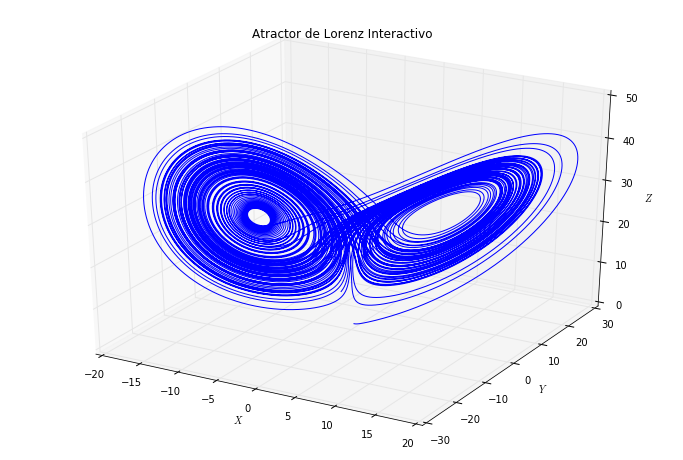

In [8]:
fig3d = plt.figure(figsize = (12, 8))
ax3d = fig3d.gca(projection='3d')
ax3d.plot(vt[:,0][:img_res], vt[:,1][:img_res], vt[:,2][:img_res]) #intervalo limitado para a imagem não saturar
ax3d.set_xlabel('$X$')
ax3d.set_ylabel('$Y$')
ax3d.set_zlabel('$Z$')
ax3d.set_title('Atractor de Lorenz Interactivo')
plt.show()

#### Mapa de Lorenz ####
Analisando a dinâmica do seu atractor estranho, _Lorenz_ verificou existir uma propriedade do sistema que permitia obter alguma ordem a partir do caos.

Essa propriedade diz que $z_{n}$, o n-ésimo máximo local de $z(t)$, permite saber $z_{n+1}$ o máximo local seguinte a $z_{n}$.

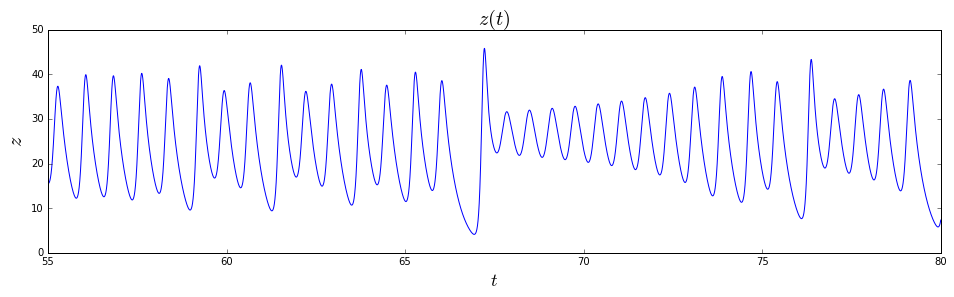

In [9]:
fig4 = plt.figure(figsize = (16,4))
ax4 = plt.subplot(111, xlim=(55,80)) #intervalo entre 55 e 80 segundos, escolhido arbitrariamente.
ax4.set_xlabel('$t$', fontsize=18)
ax4.set_ylabel('$z$', fontsize=20)
ax4.set_title('$z(t)$', fontsize=20)
ax4.axhline(y = 0, color = 'k')
plt.plot(t, vt[:,2])
plt.show()

Da mesma forma que acima, comparam-se os 3 eixos representados em função do tempo:

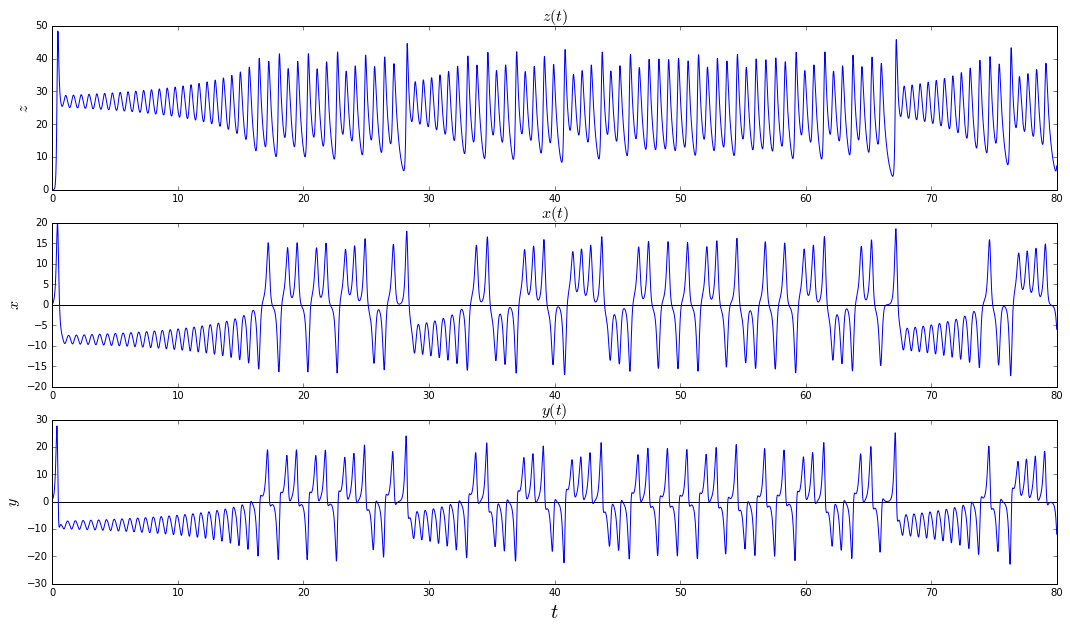

In [10]:
plt.figure(figsize=(18,10))
axzt = plt.subplot(311, xlim=(0,80))
axzt.set_ylabel('$z$', size = 16)
axzt.set_title('$z(t)$', size = 16)
axzt.axhline(y = 0, color = 'k')
plt.plot(t, vt[:, 2])

axxt = plt.subplot(312, xlim=(0,80))
axxt.set_ylabel('$x$', size = 16)
axxt.set_title('$x(t)$', size = 16)
axxt.axhline(y = 0, color = 'k')
plt.plot(t, vt[:, 0])

axxt = plt.subplot(313, xlim=(0,80))
axxt.set_xlabel('$t$', size = 20)
axxt.set_ylabel('$y$', size = 16)
axxt.set_title('$y(t)$', size = 16)
axxt.axhline(y = 0, color = 'k')
plt.plot(t, vt[:, 1])
plt.show()

Para se encontrar os máximos locais de $z(t)$ utiliza-se o módulo do SciPy __argrelmax__

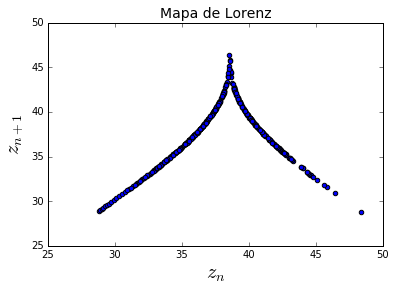

In [11]:
nmax = argrelmax(vt[:, 2])[0]
plt.scatter(vt[:,2][nmax[:-1]], vt[:,2][nmax[1:]])
plt.title("Mapa de Lorenz", fontsize=14)
plt.xlabel('$z_{n}$', fontsize=20)
plt.ylabel('$z_{n+1}$', fontsize=20)
plt.show()

A dimensão de correlação $d_{corr}$, é um indicador utilizado para o estudo de sistemas caóticos, como um atractor estranho, após ter estabilizado, atendendo ao facto de estes possuírem tipicamente uma microestrutura fractal.

Para a calcular , de acordo com o algoritmo de Grassberger & Procaccia (1983), é necessário:
- Define-se um conjunto de vários pontos no sistema , **xpt**, após o mesmo ter estabilizado, como referência.
- A esses pontos aplica-se um intervalo de distâncias **rdist** ciclicamente.
- A cada um dos pontos escolhidos, verifica-se a vizinhança de cada um a cada distância
- Para cada cicle é guardado o valor do número de vezes que a condição anterior se verificou.
- Deve-se depois observar e analisar a relação entre contagens por distância ao ponto, e a partir da análise do gráfico obtido

Como em princípio $C(r) \sim \epsilon^{d}$, colocando $log(r)$ em função de $log(C)$, pretende-se, considerando a parte com comportamento linear da representação gráfica, determinar $d_{corr}$ através de uma regressão linear.

In [12]:
t_stable = int(20/dt)           # a partir dos 20 segundos ~ ponto de estabilização
xpt = np.arange(t_stable, len(t), 20)
rdist = np.arange(0.5, 50, 0.05) # distâncias de vizinhança com intervalo curto para melhor análise de relação
xpt_size, r_size = np.size(xpt), np.size(rdist)
from tqdm import *
count = np.zeros(r_size)
for i in tqdm(range(0, r_size)):
    for j, k in zip(xpt, range(t_stable, len(t))):
        if np.linalg.norm(vt[j]-vt[k]) <= rdist[i]: count[i] += 1
        # if ((xs[j] - xs[k])**2 + (ys[j] - ys[k])**2 + (zs[j] - zs[k])**2)**0.5 <= rdist[i]: count[i] += 1

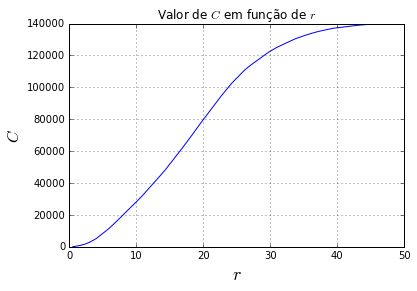

In [13]:
plt.figure()
plt.plot(rdist, count)
plt.ylabel('$C$', size = 16)
plt.xlabel('$r$', size = 18)
plt.title('Valor de $C$ em função de $r$')
plt.grid(True)
plt.show()

Nesta figura verifica-se a eficácia do método, ao relacionar conforme esperado o número de pontos abrangidos em função do raio.

O número de pontos abrangidos vai aumentando, para valores de r pequenos, lentamente. Assim que toma valores sufecientemente grandes para apanhar a maior parte do sistema, vai crescendo, aumentando linearmente, até que a contagem estagna, aproximando-se do total de pontos do sistema simulado, já que o valor de r entretanto passa a ser suficientemente grande para englobar todos os pontos possíveis.


Para estimar o coeficiente, representa-se gráficamente $log(C)$ em função de $log(r)$, de forma a encontrar o declive do crescimento linear na figura.

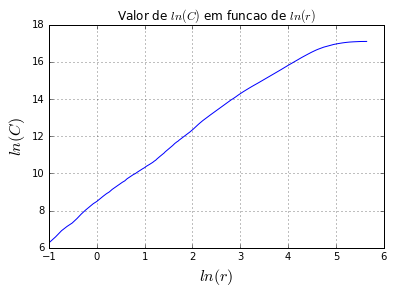

In [29]:
r_log = np.log2(rdist)
c_log = np.log2(count)
plt.plot(r_log, c_log)
plt.ylabel('$\ln(C)$', size = 16)
plt.xlabel('$\ln(r)$', size = 16)
plt.title('Valor de $\ln(C)$ em funcao de $\ln(r)$')
plt.grid(True)
plt.show()

Como o que interessa é a Parte linear, ajusta-se a representação

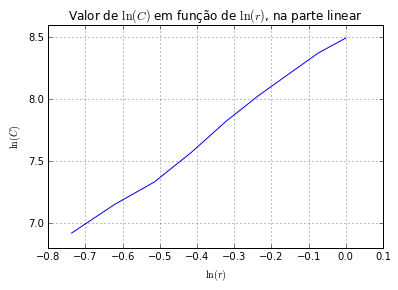

Região com comportamento linear: r =  [ 0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]


In [31]:
ra = 2  # para evitar valores a tender para infinito
rb = 11 # valor para o qual se encontrou a melhor exibição de linearidade, por tentativa e erro
plt.ylabel('$\ln(C)$')
plt.xlabel('$\ln(r)$')
plt.title('Valor de $\ln(C)$ em função de $\ln(r)$, na parte linear')
plt.grid(True)
plt.plot(r_log[ra:rb], c_log[ra:rb])
plt.show()

print('Região com comportamento linear: r = ',  rdist[ra:rb])

Procede-se então à regressão linear tendo em conta apenas os valores em que o gráfico apresenta um crescimento linear:

In [16]:
len(r_log)

990

In [17]:
slope, intercept, r_value, p_value, slope_std_error = linregress(r_log[ra:rb], c_log[ra:rb])
print("declive da recta = ", slope)
print("desvio    padrão = ", slope_std_error)

declive da recta =  2.21137292004
desvio    padrão =  0.0436932332492


O resultado foi: 

que corresponde ao valor da dimensão de correlação do atractor de Lorenz, comparando com o exemplo $11.5.1$ do Strogatz, em que Grassberger & Procaccia (1983) obtiveram $d_{corr} = 2.05 \pm 0.01 $.

## Mapa Logístico ##
O mapa logístico é um exemplo de como sistemas de equações não-lineares podem exibir comportamento caótico, sendo que se são denominados por mapas alguns sistemas dinâmicos com relações de recursão.

É definido como:

$x_{n+1} = rx_{n}(1-x_{n})$

E definido numa função em Python como:

In [18]:
def logisticmap(x0, r, n_max):
    x, x[0] = np.zeros(n_max), x0
    for n in range(n_max-1): x[n+1] = r * x[n] * (1 - x[n])
    return x

E representado graficamente como:

In [19]:
x0_map, log_map, n_map = 0.01, 3.3, 50
xn_map_pts, n_map_pts = logisticmap(x0_map, log_map, n_map), np.arange(n_map)


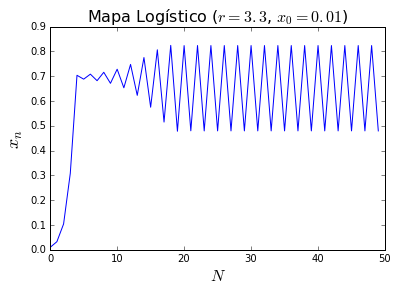

In [20]:
plt.plot(n_map_pts, xn_map_pts)
plt.xlabel('$N$', size = 16)
plt.ylabel('$x_{n}$', size = 18)
plt.title('Mapa Logístico ($r=3.3$, $x_{0}=0.01$)', fontsize = 16)
plt.show()

Se representado como $x_{n+1}$ em função de $x_{n}$, obtemos um diagrama em teia:

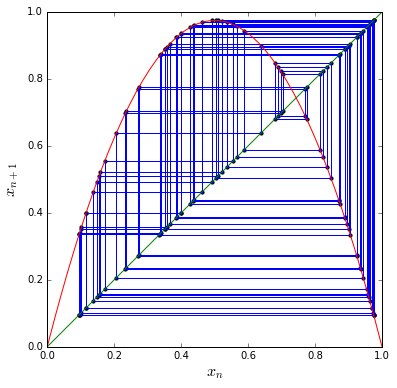

In [21]:
def logweb(x0, r, n):
    x = [x0]
    for i in range(n): x.append(r*x[i-1]*(1-x[i-1]))
    return x
webxn, a = logweb(0.1, 3.9, 150), np.linspace(0,1)
plt.figure(figsize=(6,6))
plt.plot(webxn[0:-1], webxn[1:])
plt.plot(a, a)
plt.plot(a, 3.9*a*(1-a))
plt.scatter(webxn[:-1], webxn[1:], s=10)
plt.xlim(0., 1.) 
plt.ylim(0., 1.)
plt.xlabel('$x_{n}$', size=16)
plt.ylabel('$x_{n+1}$', size=16)
plt.show()

O diagrama de bifurcação sumariza o comportamento do mapa logistico em função de $r$ .

Sabe-se que apenas são relevantes os resultados para os quais $r \in [0, 4]$

Gera-se assim o diagrama:

In [22]:
def logmapbif(x0, r, n):
    rmin, rmax, dr = r
    nmin, nmax = n
    rspan = np.arange(rmin, rmax, dr)
    lx, lr = [], []
    for k in rspan:
        lxi, lxi[0] = np.zeros(nmax), x0
        for i in range(1, nmax): lxi[i] = k * lxi[i-1] * (1 - lxi[i-1]) # 
        lxi = lxi[nmin:]
        for xi in lxi:
            lx.append(xi), lr.append(k)
    lrx = [lr, lx]
    return lrx

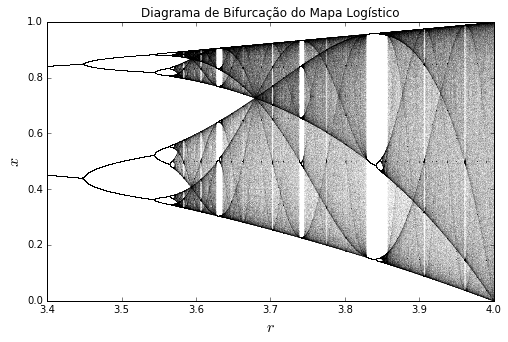

In [23]:
ri, rf, x0 = 3.4, 4, 0.3
xr = logmapbif(x0, (ri, rf, 0.0001), (300, 600))
plt.figure(figsize=(8,5))
plt.scatter(xr[0], xr[1], s = 0.0001)
plt.xlim(ri, rf)
plt.ylim(0.0, 1.0)
plt.title('Diagrama de Bifurcação do Mapa Logístico')
plt.xlabel('$r$', size=16)
plt.ylabel('$x$', size=16)
plt.show()

Pode-se também observar num intervalo mais curto, com mais aproximação:

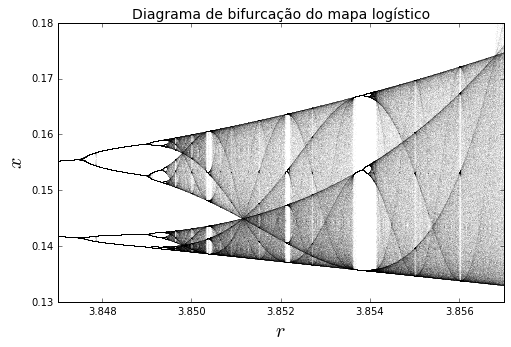

In [24]:
ri, rf, x0 = 3.847, 3.857, 0.1
xr = logmapbif(x0, (ri, rf, 0.000001), (300, 600))
plt.figure(figsize=(8,5))
plt.scatter(xr[0], xr[1], s = 0.0001)
plt.xlim(ri, rf)
plt.ylim(0.13, 0.18) 
plt.title('Diagrama de bifurcação do mapa logístico', size = 14)
plt.xlabel('$r$', size = 20)
plt.ylabel('$x$', size = 20)
plt.show()

Num sistema dinâmico, expoente de Lyapunov é uma caracteristica que nos permite obter informações sobre o seu comportamento, caracterizando o grau de separação entre trajectórias infinitesalmente próximas.
Para sistemas discretos, como o mapa logistico, o expoente de Lyapunov define-se como:
$$ \lambda = \lim_{n \to \infty} \frac{1}{n} \sum_{i=0}^{n-1}  ln\left| f'(x)  \right|$$

Para calcula-se o expoente de Lyapunov num conjunto de dados experimentais sem expressão definida, utiliza-se a expressão $f'(x) = r(1-2x)$

Ou seja, para calcular o expoente de Lyapunov teremos de implementar código que calcule a seguinte expressão:

$$ \lambda = \lim_{n \to \infty} \frac{1}{n} \sum_{i=0}^{n-1}  ln \left| r(1-2x_{i}) \right|$$

A implementação em Python para calcular o expoente de lyapunov em função de $r$ e $x_{0}$ é:

In [25]:
def lyapunov_logistic(x, r, n):
    rmin, rmax, dr = r
    rs = np.arange(rmin, rmax, dr)
    exp = []
    for j in rs: 
        s = 0
        lmap = logisticmap(x, j, n)
        for i in range(0, n-1):
            s+= np.log(abs((j * (1 - 2 * lmap[i]))))
        exp.append(s/n)
    return exp, rs

/home/rafael/.local/lib/python3.4/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log


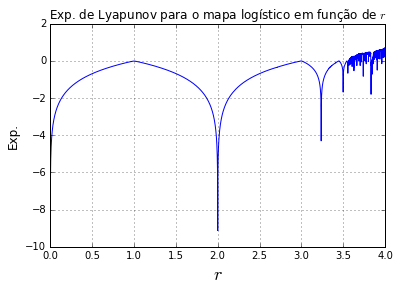

In [26]:
lyap_exp, lyap_r = lyapunov_logistic(0.1, (0, 4, 0.0001), 600)
plt.grid(True)
plt.xlabel('$r$', size = 18)
plt.ylabel('Exp.', size = 12)
plt.title('Exp. de Lyapunov para o mapa logístico em função de $r$')
plt.plot(lyap_r, lyap_exp)
plt.show()